In [15]:
df = pd.read_csv('preprocessed_foodrecipes.csv')
df.head(1)

NameError: name 'pd' is not defined

In [16]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('preprocessed_foodrecipes.csv')
df.head(1)

,link,title,ratings,num_reviews,ingredients,servings,cook_time,calorie,fat_g,carb_g,protein_g,cholesterol_mg,sodium_mg
0,https://www.allrecipes.com/recipe/100164/chip-...,Chip Truck Fries,4.44,44,"['6 baking potatoes, cut into 1/4 inch slices'...",4.0,60,369.0,14.0,56.3,6.5,0.0,478.0


In [18]:
df.shape

(4776, 13)

In [19]:
df = df[['title', 'ingredients']]
df.ingredients[0]

"['6 baking potatoes, cut into 1/4 inch slices', '1/4 cup vegetable oil', '2 teaspoons seasoned salt']"

In [20]:
import ast

def list_to_str(x):
    x = ast.literal_eval(x)
    x = ','.join(x)
    return x

In [21]:
df.ingredients = df.ingredients.apply(list_to_str)
df.ingredients[0]

'6 baking potatoes, cut into 1/4 inch slices,1/4 cup vegetable oil,2 teaspoons seasoned salt'

In [8]:
data = df.ingredients.values.tolist()
data = [re.sub(r'[^a-zA-Z]', ' ', sent.lower()) for sent in data] 
data[0]

NameError: name 're' is not defined

In [22]:
import re
data = df.ingredients.values.tolist()
data = [re.sub(r'[^a-zA-Z]', ' ', sent.lower()) for sent in data] 
data[0]

'  baking potatoes  cut into     inch slices     cup vegetable oil   teaspoons seasoned salt'

In [23]:
units = ['spoon','pound','cup','quart','ounce','pint','degree','dash','pinch','pack','halve','bunch','inch']
for unit in units:
    expre = re.compile('\w*' + unit + '\w*')
    data = [re.sub(expre, '', sent).strip() for sent in data]

data[0]

'baking potatoes  cut into      slices      vegetable oil    seasoned salt'

In [24]:
data = [' '.join(sent.split()) for sent in data]

data[0]

'baking potatoes cut into slices vegetable oil seasoned salt'

In [12]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore, CoherenceModel

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(sentence))

data_words = list(sent_to_words(data))
data_words[0]

ModuleNotFoundError: No module named 'gensim'

In [13]:
pip install -U gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110324 sha256=047501a5e0218f7c8fd58b04e2da20a00e9049f50fdf4d246d97e4e3fa2bee1c
  Stored in directory: c:\users\chamo\appdata\local\pip\cache\wheels\56\b5\6d\86dbe4f29d4688e5163a8b8c6b740494310040286fca4dc648
  Created wheel for boto3: filename=boto3-1.14.39-py2.py3-none-any.whl size=127854 sha256=84fe2eaedc38db4ce5951fc4cb023f5e58b536ee1ae37fae4f0e44c386b2a8c7
  Stored in directory: c:\users\chamo\appdata\local\pip\cache\wheels\94\45\60\7636b61fcfc88fff997a248cd9e1318f3e01533a91aaca552e
Successfully built smart-open boto3
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15
Note: you may need to restart the kernel to use updated packages.


In [25]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore, CoherenceModel

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(sentence))

data_words = list(sent_to_words(data))
data_words[0]

['baking',
 'potatoes',
 'cut',
 'into',
 'slices',
 'vegetable',
 'oil',
 'seasoned',
 'salt']

In [26]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 

In [27]:
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [28]:
data_bigram = [bigram_mod[doc] for doc in data_words]
data_bigram[0]

['baking',
 'potatoes',
 'cut',
 'into',
 'slices',
 'vegetable',
 'oil',
 'seasoned',
 'salt']

In [18]:
data_bigram[1]

['irish',
 'bacon',
 'diced',
 'large',
 'potatoes',
 'peeled',
 'and',
 'cubed',
 'can',
 'diced',
 'tomatoes',
 'with',
 'juice',
 'chicken',
 'stock',
 'or',
 'as',
 'needed',
 'salt',
 'and',
 'black',
 'pepper',
 'to',
 'taste',
 'thinly',
 'sliced',
 'dark',
 'green',
 'savoy',
 'cabbage',
 'leaves']

In [19]:
stop_words = stopwords.words('english')

NameError: name 'stopwords' is not defined

In [29]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [30]:
data_nonstop = [[word for word in doc if word not in stop_words] for doc in data_bigram]
data_nonstop[0]

['baking', 'potatoes', 'cut', 'slices', 'vegetable', 'oil', 'seasoned', 'salt']

In [22]:
data_nonstop[1]

['irish',
 'bacon',
 'diced',
 'large',
 'potatoes',
 'peeled',
 'cubed',
 'diced',
 'tomatoes',
 'juice',
 'chicken',
 'stock',
 'needed',
 'salt',
 'black',
 'pepper',
 'taste',
 'thinly',
 'sliced',
 'dark',
 'green',
 'savoy',
 'cabbage',
 'leaves']

In [31]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatization(texts, allowed_postages=['NOUN','ADJ']):
    texts_out = []
    for sent in texts:
        doc = nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postages])
    return texts_out

In [24]:
import spacy

ModuleNotFoundError: No module named 'spacy'

In [25]:
pip install spacy

  Created wheel for wasabi: filename=wasabi-0.7.1-py3-none-any.whl size=20841 sha256=9ad6a3b4bfabde7efe76c1ba00cc6dd0954a5463cc2d36801e3dea26d2c3ad1e
  Stored in directory: c:\users\chamo\appdata\local\pip\cache\wheels\dc\5e\d4\727b6213e9ebec502ff1bf5998f4a83fef87c3aace8a492243
Successfully built wasabi
Note: you may need to restart the kernel to use updated packages.


In [26]:
import spacy

In [30]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [28]:
python -m spacy download en

SyntaxError: invalid syntax (<ipython-input-28-fc4d5d118d23>, line 1)

In [31]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [32]:
data_lemmatized = lemmatization(data_nonstop, allowed_postags=['NOUN','ADJ'])
data_lemmatized[0]

TypeError: lemmatization() got an unexpected keyword argument 'allowed_postags'

In [1]:
import spacy

In [2]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [3]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz --no-deps

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019125 sha256=1c3067917f0fc10b8465e925ee28375db6379fbfa7417e8cd29557c9aefd0bd1
  Stored in directory: c:\users\chamo\appdata\local\pip\cache\wheels\64\69\41\6f820cf1d7488a0381a2059f66ec9f8f23116f7c67d18f3d8d
Successfully built en-core-web-sm
Note: you may need to restart the kernel to use updated packages.


In [4]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [5]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [6]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [7]:
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (<ipython-input-7-e8a31c0c54ec>, line 1)

In [8]:
spacy.cli.download("en")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✘ Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\chamo\anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\chamo\anaconda3\lib\site-packages\spacy\data\en
⚠ Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


In [9]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [10]:
data_lemmatized = lemmatization(data_nonstop, allowed_postags=['NOUN','ADJ'])
data_lemmatized[0]

NameError: name 'lemmatization' is not defined

In [34]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatization(texts, allowed_postages=['NOUN','ADJ']):
    texts_out = []
    for sent in texts:
        doc = nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postages])
    return texts_out

In [36]:
data_lemmatized = lemmatization(data_nonstop, allowed_postages=['NOUN','ADJ'])
data_lemmatized[0]

['potato', 'slice', 'vegetable', 'oil', 'salt']

In [37]:
data_lemmatized[1]

['large',
 'potato',
 'tomato',
 'juice',
 'chicken',
 'stock',
 'salt',
 'black',
 'pepper',
 'taste',
 'dark',
 'green',
 'savoy',
 'cabbage',
 'leave']

In [39]:
data_lemmatized[0]

['potato', 'slice', 'vegetable', 'oil', 'salt']

In [40]:
data_lemmatized[2]

['pink',
 'salmon',
 'green',
 'onion',
 'celery',
 'mayonnaise',
 'lemon',
 'juice',
 'dill',
 'salt']

In [41]:
#to check word frequencies
vocab = dict()
for doc in data_lemmatized:
    for word in doc:
        if word not in vocab.keys():
            vocab[word] = 1
        else:
            vocab[word] +=1

In [42]:
len(vocab)

1206

In [43]:
recipe_stopwords = ['slice','large','diced','stock','taste','leave','powder','sliced','fresh','low','fat',
                    'whole','purpose','mix','ripe','medium','raw','coarse','style','active','dry','ground',
                    'white','heart','piece','crushed','cut','minute','pocket','shredded','optional','cube',
                    'hour','bag','baby','seeded','small','clove','country','leaf','dressing','center','fillet',
                    'sea','chunk','light','food','head','container','link','frozen','can','cooked','stalk',
                    'regular','dusting','heavy','round','rinsed','thawed','jar','solid','creamy','z','fluid',
                    'uncooked','sheet','strip','short','soft','mixed','blue','flake','warm','unbleached','sun',
                    'old','topping','wedge','thick','lean','extra','meal','preserve','mild','half','crosswise',
                    'new','seasoning','kidney','black','green','red','yellow','white','unpeeled','boiling',
                    'amount','cold','snow','cluster','necessary','firm','soda','cubed','temperature','deep',
                    'flat','iron','seedless','boneless','strong','bottle','unsweetended','smoked','melted',
                    'thin','hard','pure','bulk','unsalted','deveined','petite','cooking','box','prepared',
                    'softened','split','kosher','blanched_slivered','carton','canned','flavor','broken','free',
                    'blend','lengthwise','real','purple','dice','flaked','bite_sized','refrigerated_crescent',
                    'reserved','undrained','original','stuffing','bulb','sharp','reduced_fat','color',
                    'pressed','diagonal','good','season','bit','jumbo','instant','skim','chopped','paper',
                    'towel','roasted','flaky','ear','flavoring','fine','minced', 'square','size','single',
                    'refrigerated','skinless','pitted','bay','seasoned','divided','long','crumbled','filling',
                    'miniature','mashed','peeled','top','bottom','flat_leaf','rubbed','liquid','ready','chop',
                    'non','frying','condensed','stewed','light','food','container','link','can','optional',
                    'diced','fluid','meal','preserve','seasoning','bottle','box','split','flavor','lengthwise',
                    'flavoring','square','size','at_room','grade','shape','cuisine']

In [44]:
data_clean = [[word for word in doc if word not in recipe_stopwords] for doc in data_lemmatized]

In [45]:
data_clean[0]

['potato', 'vegetable', 'oil', 'salt']

In [46]:
data_clean[1]

['potato',
 'tomato',
 'juice',
 'chicken',
 'salt',
 'pepper',
 'dark',
 'savoy',
 'cabbage']

In [58]:
#checking the word frequencies
vocab_clean = dict()
for doc in data_clean:
    for word in doc:
        if word not in vocab_clean.keys():
            vocab_clean[word] = 1
        else:
            vocab_clean[word] +=1

In [59]:
len(vocab_clean)

1015

In [60]:
#creating a df including word counts
df_count = pd.DataFrame(vocab_clean, index=['count']).transpose().sort_values('count', ascending=False)
df_count = df_count.reset_index().rename(columns={'index':'ingredient'})
df_count.head()

,ingredient,count
0,pepper,4394
1,salt,2820
2,onion,2773
3,oil,2151
4,cheese,1674


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
def plot_ingredient(df, top_n=10, figsize=(8,10)):
    plt.figure(figsize=figsize)
    
    count = df['count'].iloc[:top_n]
    ingred = df['ingredient'].iloc[:top_n]
    sns.barplot(x=count, y= ingred, palette='Reds_r')
    plt.title(f'{top_n} frequent ingredients\n)
    plt.xlabel('Count')
    plt.ylabel('Ingredient')
    plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-51-7ec712878491>, line 7)

In [52]:
def plot_ingredient(df, top_n=10, figsize=(8,10)):
    plt.figure(figsize=figsize)
    
    count = df['count'].iloc[:top_n]
    ingred = df['ingredient'].iloc[:top_n]
    sns.barplot(x=count, y= ingred, palette='Reds_r')
    plt.title(f'{top_n} frequent ingredients\n')
    plt.xlabel('Count')
    plt.ylabel('Ingredient')
    plt.show()

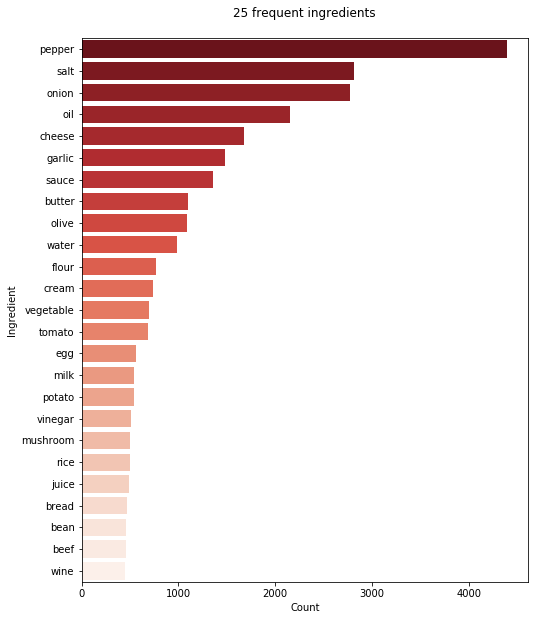

In [53]:
plot_ingredient(df_count, top_n=25)

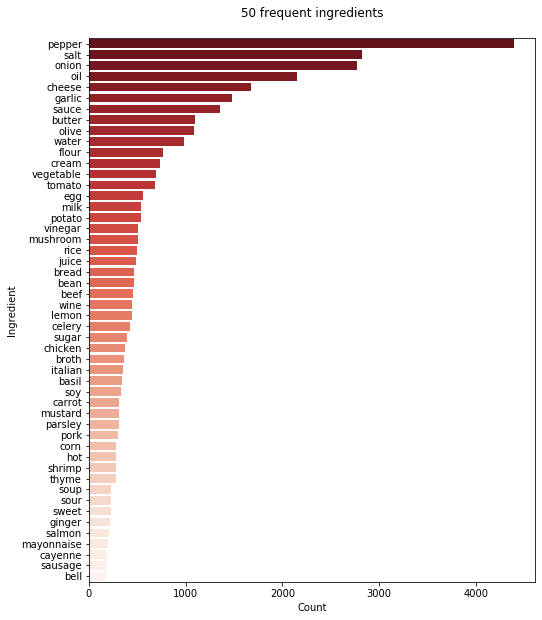

In [54]:
plot_ingredient(df_count, top_n=50)

In [55]:
recipe_stopwords = ['slice','large','diced','stock','taste','leave','powder','sliced','fresh','low','fat',
                    'whole','purpose','mix','ripe','medium','raw','coarse','style','active','dry','ground',
                    'white','heart','piece','crushed','cut','minute','pocket','shredded','optional','cube',
                    'hour','bag','baby','seeded','small','clove','country','leaf','dressing','center','fillet',
                    'sea','chunk','light','food','head','container','link','frozen','can','cooked','stalk',
                    'regular','dusting','heavy','round','rinsed','thawed','jar','solid','creamy','z','fluid',
                    'uncooked','sheet','strip','short','soft','mixed','blue','flake','warm','unbleached','sun',
                    'old','topping','wedge','thick','lean','extra','meal','preserve','mild','half','crosswise',
                    'new','seasoning','kidney','black','green','red','yellow','white','unpeeled','boiling',
                    'amount','cold','snow','cluster','necessary','firm','soda','cubed','temperature','deep',
                    'flat','iron','seedless','boneless','strong','bottle','unsweetended','smoked','melted',
                    'thin','hard','pure','bulk','unsalted','deveined','petite','cooking','box','prepared',
                    'softened','split','kosher','blanched_slivered','carton','canned','flavor','broken','free',
                    'blend','lengthwise','real','purple','dice','flaked','bite_sized','refrigerated_crescent',
                    'reserved','undrained','original','stuffing','bulb','sharp','reduced_fat','color',
                    'pressed','diagonal','good','season','bit','jumbo','instant','skim','chopped','paper',
                    'towel','roasted','flaky','ear','flavoring','fine','minced', 'square','size','single',
                    'refrigerated','skinless','pitted','bay','seasoned','divided','long','crumbled','filling',
                    'miniature','mashed','peeled','top','bottom','flat_leaf','rubbed','liquid','ready','chop',
                    'non','frying','condensed','stewed','light','food','container','link','can','optional',
                    'diced','fluid','meal','preserve','seasoning','bottle','box','split','flavor','lengthwise',
                    'flavoring','square','size','at_room','grade','shape','cuisine','hot','sour']

In [56]:
data_clean = [[word for word in doc if word not in recipe_stopwords] for doc in data_lemmatized]

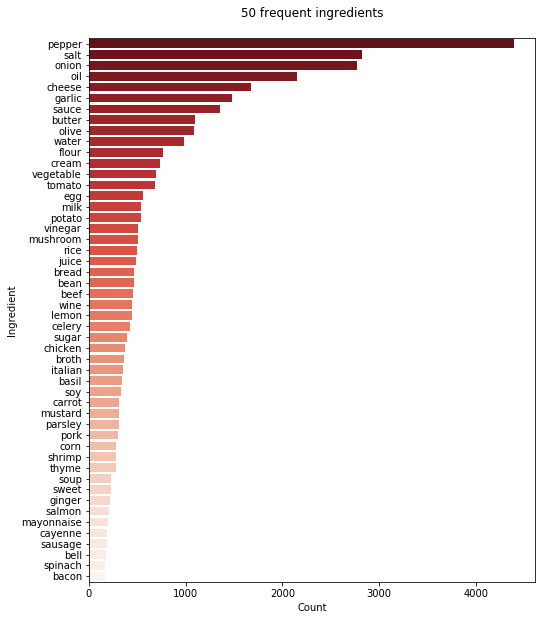

In [61]:
plot_ingredient(df_count, top_n=50)